# Financial Planning with APIs and Simulations

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

Determine the current value of a member’s cryptocurrency wallet. Collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). 

In [78]:
# The current number of coins for each cryptocurrency asset held in the portfolio.(prototype)
btc_coins = 1.2
eth_coins = 5.3

In [79]:
# The monthly amount for the member's household income (prototype)
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [80]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using API endpoints

In [81]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18948737,
            "id": 1,
            "last_updated": 1643984922,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 716422068843,
                    "percent_change_1h": -0.551370323197719,
                    "percent_change_24h": 2.96115165100727,
                    "percent_change_7d": 1.35668349302112,
                    "percentage_change_1h": -0.551370323197719,
                    "percentage_change_24h": 2.96115165100727,
                    "percentage_change_7d": 1.35668349302112,
                    "price": 37783.0,
                    "volume_24h": 17411870081
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18948737,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [82]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119442048,
            "id": 1027,
            "last_updated": 1643984882,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 334213743930,
                    "percent_change_1h": -1.16987214096095,
                    "percent_change_24h": 7.3432726592862,
                    "percent_change_7d": 16.3378909829457,
                    "percentage_change_1h": -1.16987214096095,
                    "percentage_change_24h": 7.3432726592862,
                    "percentage_change_7d": 16.3378909829457,
                    "price": 2805.91,
                    "volume_24h": 15557079683
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119442048,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies

In [83]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price'] 

# Print the current price of BTC
print(f'The current price of Bitcoin is ${btc_price}')

The current price of Bitcoin is $37783.0


In [84]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of Ethereum is ${eth_price}')

The current price of Ethereum is $2805.91


In [86]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'The current value of your Bitcoin holdings is ${round(btc_value, 2)}')


The current value of your Bitcoin holdings is $45339.6


In [87]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'The current value of your Ethereum holdings is ${round(eth_value, 2)}')

The current value of your Ethereum holdings is $14871.32


In [89]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The total current value of your cryptocurrency wallet is ${round(total_crypto_wallet,2)}')

The total current value of your cryptocurrency wallet is $60210.92


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

Determine the current value of a member’s stock and bond holdings. For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. 

In [90]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

In [91]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [92]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = '1D'

# Format current date as ISO format
start_date = pd.Timestamp('2022-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-02-01', tz='America/New_York').isoformat()


In [93]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2022-02-01 00:00:00-05:00  111.66  111.6764  111.38  111.59  9477222  450.72   

                                                                
                             high       low   close     volume  
time                                                            
2022-02-01 00:00:00-05:00  453.63  446.9384  452.96  106515279

In [103]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio['AGG']['close'])

# Print the AGG closing price
print(f'The AGG closing price on {end_date} was ${agg_close_price}')

The AGG closing price on 2022-02-01T00:00:00-05:00 was $111.59


In [104]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio['SPY']['close'])

# Print the SPY closing price
print(f'The SPY closing price on {end_date} was ${spy_close_price}')

The SPY closing price on 2022-02-01T00:00:00-05:00 was $452.96


In [107]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'The current value of your bond portfolio is ${agg_value}')

The current value of your bond portfolio is $22318.0


In [108]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'The current value of your stock portfolio is ${spy_value}')

The current value of your stock portfolio is $49825.6


In [109]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The current balance of your stock and bond portfolio is ${total_stocks_bonds}')

The current balance of your stock and bond portfolio is $72143.6


In [111]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

print(f'The current balance of your cryptocurrency wallet is ${round(total_crypto_wallet, 2)}')
print(f'The current balance of your stock and bond portfolio is ${round(total_stocks_bonds, 2)}')
print(f'The current balance of your entire savings portfolio is ${round(total_portfolio, 2)}')


The current balance of your cryptocurrency wallet is $60210.92
The current balance of your stock and bond portfolio is $72143.6
The current balance of your entire savings portfolio is $132354.52


### Evaluate the Emergency Fund


In [54]:
# Consolidate financial assets data into a Python list
savings_data = [total_stocks_bonds, total_crypto_wallet]

# Review the Python list savings_data
print(savings_data)

[72143.6, 57848.655999999995]


In [112]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    index = ['Crypto', 'Stock/Bond'],
    columns = ['Amount']
)

# Display the savings_df DataFrame
print(savings_df)

               Amount
Crypto      72143.600
Stock/Bond  57848.656


#### Visualize the composition of the member's portfolio using the `savings_df` DataFrame to plot a pie chart. The y-axis of the pie chart uses `amount`.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

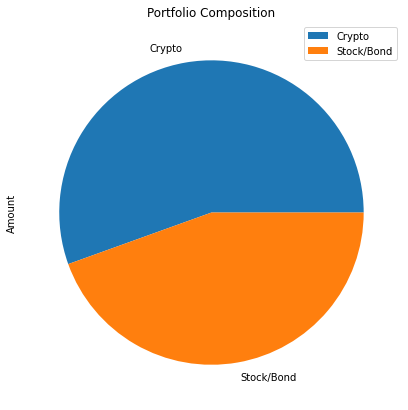

In [113]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(
    y = 'Amount',
    title = 'Portfolio Composition',
    figsize = (7, 7)
)


#### Determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. 

In [57]:
# emergency_fund_value is equal to 3 times the monthly income
emergency_fund_value = 3 * monthly_income

In [58]:
# Evaluate the amount of the emergency fund:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money to weather an emergency.')
elif total_portfolio == emergency_fund_value:
    print('Congratulations, you have reached and important financial goal.')
else:
    print(f'You are on the right track, you have ${emergency_fund_value - total_portfolio: .2f} left to save.')

Congratulations! You have enough money to weather an emergency.


## Financial Planner for Retirement

#### Using the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [114]:
# Set start and end dates of 3 years back from your current date
start_date = pd.Timestamp('2019-02-02', tz = 'America/New_York').isoformat()
end_date = pd.Timestamp('2022-02-02', tz = 'America/New_York').isoformat()
# Set number of rows to 1000 to retrieve the maximum amount of rows
rows = 1000

In [115]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data

stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = rows
).df

# Display both the first and last five rows of the DataFrame
display(stock_df.head())
display(stock_df.tail())

AGG                                        \
                             open      high      low     close   volume   
time                                                                      
2019-02-04 00:00:00-05:00  106.83  106.9000  106.770  106.8950  9790488   
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674   

                              SPY                                      
                             open      high     low   close    volume  
time                                                                   
2019-02-04 00:00:00-05:00  270.11  271.8000  269.36  271.78  46985797  
2019-02-05 00:00:00-05:00  272.44  273.4400  271.88  273.13  61540042  
2019-02-06 00:00:00-05:00  272.79  273.3400  271.92  272.70  43446324  
2019-02-07 00:00:00-05:00  270.94  271.5500  268.29  269.97  83380785  
2019-02-08 00:00:00-05:00  268.75  270.2874  267.83  270.08  63409417

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-27 00:00:00-05:00  111.62  111.8800  111.6200  111.72   5836124   
2022-01-28 00:00:00-05:00  111.46  111.8600  111.4400  111.81  10400422   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2022-01-27 00:00:00-05:00  438.26  441.58  429.4500  431.270  136251597  
2022-01-28 00:00:00-05:00  432.70  442.00  427.8200  441.920  142062305  
2022-01-31 00:00:00-05:00  441.24  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  450.72  453.63  446.9384  452.960  106515279  
2022-02-02 00:00:00-05:00  455.50  458.12  453.0500  457.300   97807976

#### Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [116]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_30year = MCSimulation(
    portfolio_data = stock_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
mc_30year.portfolio_data.head()

AGG                                        \
                             open      high      low     close   volume   
time                                                                      
2019-02-04 00:00:00-05:00  106.83  106.9000  106.770  106.8950  9790488   
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-02-04 00:00:00-05:00          NaN  270.11  271.8000  269.36  271.78   
2019-02-05 00:00:00-05:00     0.001824  272.44  273.4400  271.88  273.13   
2019-02-06 00:00:00-05:00    -0.000429  272.79  273.3400  271.92  272.70   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.29  269.97   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.83  270.08   

                                                  
                             volume daily_return  
time                                              
2019-02-04 00:00:00-05:00  46985797          NaN  
2019-02-05 00:00:00-05:00  61540042     0.004967  
2019-02-06 00:00:00-05:00  43446324    -0.001574  
2019-02-07 00:00:00-05:00  83380785    -0.010011  
2019-02-08 00:00:00-05:00  63409417     0.000407

In [117]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/rachelbates/Desktop/FinTech_Workspace/Homework_Activities/Module_5/financial_planning_tools/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002912,1.008022,1.004878,1.002831,1.000662,1.010850,1.002991,1.002152,1.009526,1.005299,...,1.007634,0.997092,1.005011,0.996890,1.011717,1.005739,0.984005,1.012741,0.991516,0.985737
2,1.003968,1.028401,1.005532,0.995972,0.996826,1.017325,1.000499,1.003665,1.005704,1.000777,...,1.007679,0.988885,1.003723,0.992549,1.009860,0.998448,0.977962,1.030556,0.992064,0.994462
3,1.027532,1.016629,0.998961,0.985120,0.997838,1.021242,1.009626,1.008826,1.008422,0.992541,...,0.995686,0.977253,1.002571,0.984645,1.020250,1.016200,0.984205,1.043306,0.987540,1.005931
4,1.013574,1.012793,0.995224,0.995876,0.998755,1.017539,0.994258,1.007562,1.002859,0.987456,...,0.988416,0.977654,1.007652,0.983529,1.013142,1.016040,0.994411,1.052216,1.003570,1.000236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,69.620425,14.416671,69.658373,12.792112,15.732309,183.650495,31.180325,92.951461,46.861558,67.278394,...,12.509212,7.116944,23.616021,120.870546,10.425783,19.146665,46.878689,25.584369,9.337839,15.337517
7557,68.831848,14.575524,68.872021,12.738022,15.618955,185.815858,31.283579,92.696258,46.987736,67.319728,...,12.561133,7.025908,23.732751,120.131778,10.561013,19.040843,46.786656,25.382865,9.375500,15.536371
7558,68.825531,14.581030,68.567097,12.754042,15.397199,185.130578,31.337644,92.540180,46.456194,67.509242,...,12.529433,7.088676,23.633605,119.037447,10.496756,19.008496,47.131070,25.511609,9.487957,15.760632
7559,70.240525,14.588340,68.369925,12.680774,15.331660,182.519113,31.458227,93.469876,46.490782,67.483012,...,12.564546,7.116352,23.425709,118.579158,10.345883,18.911918,47.021257,25.576285,9.450345,15.836534


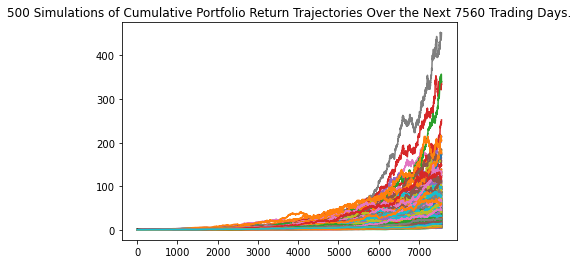

In [122]:
# Visualize the 30-year Monte Carlo simulation with an
# overlay line plot
line_plot = mc_30year.plot_simulation()
#save the plot for document display
line_plot.get_figure().savefig('Images/mc_30year_sim_plot.png', bbox_inches='tight')

#### Plot the probability distribution of the Monte Carlo simulation.

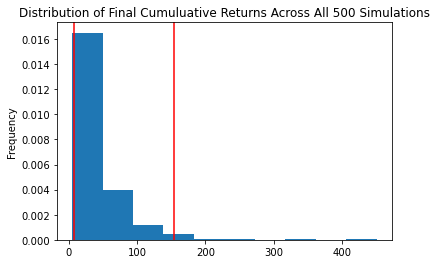

In [124]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
dist_plot = mc_30year.plot_distribution()
#save the plot for document display
dist_plot.get_figure().savefig('Images/mc_30year_dist_plot.png', bbox_inches='tight')

#### Generate the summary statistics for the Monte Carlo simulation.

In [126]:
# Summary statistics from the 30-year Monte Carlo simulation results
mc30_summary = mc_30year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(mc30_summary)

count           500.000000
mean             43.691614
std              43.956561
min               4.920825
25%              18.502440
50%              30.889208
75%              52.174927
max             450.571783
95% CI Lower      7.741125
95% CI Upper    154.502538
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

In [127]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio = ${total_stocks_bonds}')

investment_amount = total_stocks_bonds
ci_lower = mc30_summary[8]
ci_upper = mc30_summary[9]

print(f'The lower bounds for the expected value of the portfolio with a 95% confidence interval is {ci_lower}')
print(f'The upper bounds for the expected value of the portfolio with a 95% confidence interval is {ci_upper}')

The current balance of the stock and bond portion of the portfolio = $72143.6
The lower bounds for the expected value of the portfolio with a 95% confidence interval is 7.741125464619856
The upper bounds for the expected value of the portfolio with a 95% confidence interval is 154.5025384668485


In [129]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(ci_lower * investment_amount, 2)
ci_upper_thirty_cumulative_return = round(ci_upper * investment_amount, 2)

# Print the result of your calculations
print(f'The range of possible outcomes with a 95% confidence level for the current stock/bond portfolio')
print(f'is between ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}')


The range of possible outcomes with a 95% confidence level for the current stock/bond portfolio
is between $558472.66 and $11146369.33


### Forecast Cumulative Returns in 10 Years

Adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

In [130]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mc_10year = MCSimulation(
    portfolio_data = stock_df,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Review the simulation input data
mc_10year.portfolio_data.head()

AGG                                        \
                             open      high      low     close   volume   
time                                                                      
2019-02-04 00:00:00-05:00  106.83  106.9000  106.770  106.8950  9790488   
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-02-04 00:00:00-05:00          NaN  270.11  271.8000  269.36  271.78   
2019-02-05 00:00:00-05:00     0.001824  272.44  273.4400  271.88  273.13   
2019-02-06 00:00:00-05:00    -0.000429  272.79  273.3400  271.92  272.70   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.29  269.97   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.83  270.08   

                                                  
                             volume daily_return  
time                                              
2019-02-04 00:00:00-05:00  46985797          NaN  
2019-02-05 00:00:00-05:00  61540042     0.004967  
2019-02-06 00:00:00-05:00  43446324    -0.001574  
2019-02-07 00:00:00-05:00  83380785    -0.010011  
2019-02-08 00:00:00-05:00  63409417     0.000407

In [131]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/rachelbates/Desktop/FinTech_Workspace/Homework_Activities/Module_5/financial_planning_tools/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992158,0.992698,0.988924,1.007177,1.005896,1.000214,1.005966,0.999027,1.021105,0.984404,...,1.000431,0.998328,1.007006,1.018825,0.994549,0.989746,1.002513,0.980925,0.997216,1.007789
2,0.989941,1.004554,0.990890,1.006473,1.003091,1.005615,1.010866,0.983695,1.054666,0.989700,...,0.998280,0.999901,1.011128,1.028512,0.976986,1.000192,1.002020,0.989905,1.003385,0.978391
3,0.987934,0.997865,1.000154,1.021704,0.999104,1.028564,1.023403,0.983712,1.052889,0.973257,...,1.005782,0.993995,1.012650,1.046731,0.971047,0.999593,1.016865,0.993208,1.020087,0.972519
4,0.989401,1.003940,1.001249,1.035367,0.989960,1.002627,1.016742,1.012365,1.055241,0.974793,...,1.000924,0.973536,1.011529,1.034987,0.960286,0.980681,1.026344,0.998790,1.016645,0.955042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.196505,8.803265,3.768020,3.486199,3.751314,7.278087,2.660198,6.022300,1.555028,3.776182,...,2.384058,11.875309,3.116321,6.324582,2.622314,2.700168,5.935880,14.656982,7.692571,6.190263
2517,2.238977,8.882082,3.798023,3.402969,3.727556,7.382598,2.653792,6.067784,1.561103,3.721847,...,2.389303,11.899433,3.204150,6.356967,2.617187,2.702283,5.832842,14.652923,7.768075,6.219195
2518,2.236746,8.801450,3.829949,3.428365,3.808270,7.299244,2.651567,6.173065,1.533747,3.728619,...,2.405498,11.887769,3.279459,6.432148,2.589829,2.660866,5.900929,14.913592,7.627547,6.175240
2519,2.227099,8.766579,3.871415,3.448606,3.782516,7.242142,2.618583,6.204674,1.548328,3.726378,...,2.395135,11.659495,3.284401,6.362340,2.582682,2.641320,5.960777,15.082737,7.550930,6.203648


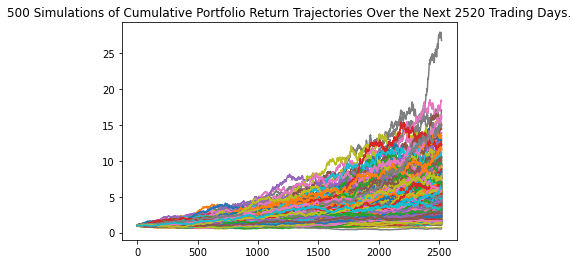

In [132]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
line_plot_10 = mc_10year.plot_simulation()
#save the plot for document display
line_plot_10.get_figure().savefig('Images/mc_10year_plot.png', bbox_inches='tight')

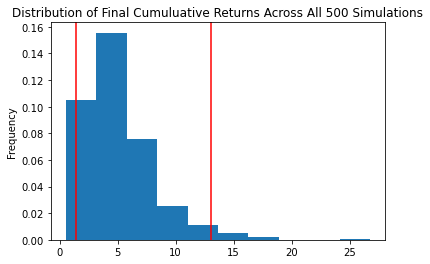

In [133]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
dist_plot_10 = mc_10year.plot_distribution()
#save the plot for document display
dist_plot_10.get_figure().savefig('Images/mc_10year_dist_plot.png', bbox_inches='tight')

In [134]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
mc10_summary = mc_10year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(mc10_summary)

count           500.000000
mean              5.061597
std               3.062742
min               0.542116
25%               2.991596
50%               4.274806
75%               6.230098
max              26.762204
95% CI Lower      1.441635
95% CI Upper     13.030137
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [75]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the members portfolio is ${total_stocks_bonds}')
investment_amount = total_stocks_bonds
ci_lower_10 = mc10_summary[8]
ci_upper_10 = mc10_summary[9]

print(f'The lower 95% confidence interval is {ci_lower_10}')
print(f'The upper 95% confidence interval is {ci_upper_10}')

The current balance of the stock and bond portion of the members portfolio is $72143.6
The lower 95% confidence interval is 1.5262094049905255
The upper 95% confidence interval is 10.282709335476026


In [77]:
# Calculate the range of the possible outcomes for the current stock/bond portfolio with a 95% confidence interval
ci_lower_ten_cumulative_return = round(ci_lower_10 * investment_amount, 2)
ci_upper_ten_cumulative_return = round(ci_upper_10 * investment_amount, 2)

# Print the result of your calculations
print(f'The possible 10-year outcomes for the current stock/bond portfolio with a 95% confidence interval')
print(f'is between ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}')

The possible 10-year outcomes for the current stock/bond portfolio with a 95% confidence interval
is between $110106.24 and $741831.67


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?